In [2]:
import sys
sys.path.append('../scripts/')
from robot import *

<IPython.core.display.Javascript object>


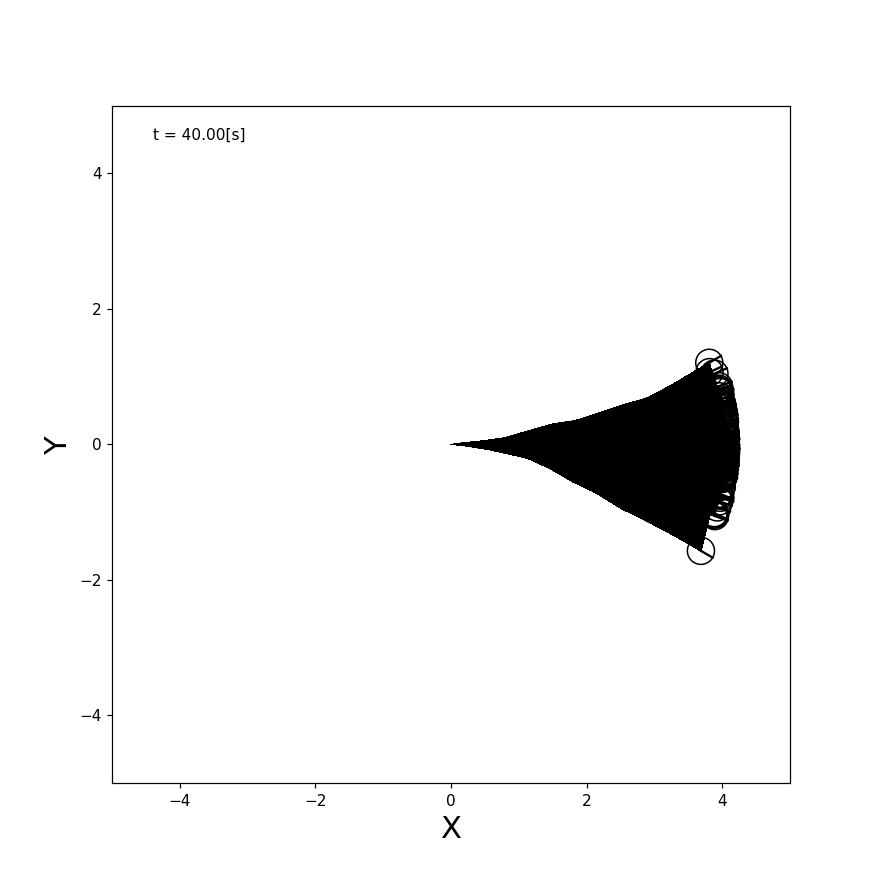

In [3]:
import copy

world = World(40.0, 0.1)

initial_pose = np.array([0, 0, 0]).T
robots = []
r = Robot(initial_pose, sensor=None, agent=Agent(0.1, 0.0))

for i in range(100):                                         # ロボットを作り、そのコピーを100回走らせる（バイアスは同じ）
    copy_r = copy.copy(r)
    copy_r.distance_until_noise = copy_r.noise_pdf.rvs()     # 最初に雑音が発生するタイミング(小石を踏むタイミング)を変える
    world.append(copy_r)                                     # worldに登録することでアニメーションの際に動く
    robots.append(copy_r)                                    # オブジェクトの参照のリストにロボットのオブジェクトを登録
    
world.draw()

In [4]:
import pandas as pd
poses = pd.DataFrame([[math.sqrt(r.pose[0]**2 + r.pose[1]**2), r.pose[2]] for r in robots], columns=['r', 'theta'])
poses.transpose()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
r,4.021316,4.060637,4.048414,4.065750,4.062502,4.061818,4.053103,4.059341,4.019891,4.063365,...,4.047864,4.060527,4.053775,4.055140,4.059578,4.048709,4.059956,4.057135,4.051879,4.049103
theta,-0.269064,-0.095548,0.219881,0.005774,0.028322,0.168628,0.110780,-0.026058,0.319018,-0.070087,...,-0.236767,-0.106545,-0.127389,0.322265,0.201300,0.313535,-0.219143,0.006181,0.305859,0.255810


In [5]:
print(poses["theta"].var())                          # θの分散
print(poses["r"].mean())                             # rの平均値
math.sqrt(poses["theta"].var()/poses["r"].mean())    # σ(直進1mで生じる向きのばらつきの標準偏差)

0.04969203510035881
4.050058629550933


0.1107675976013187